# Load the Data

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
path = "./home-credit-default-risk"
print(os.listdir(path))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [10]:
application_test = pd.read_csv(path + "/application_test.csv")
application_train = pd.read_csv(path + "/application_train.csv")
bureau = pd.read_csv(path + "/bureau.csv")
bureau_balance = pd.read_csv(path + "/bureau_balance.csv")
credit_card_balance = pd.read_csv(path + "/credit_card_balance.csv")
installments_payments = pd.read_csv(path + "/installments_payments.csv")
POS_CASH_balance = pd.read_csv(path + "/POS_CASH_balance.csv")
previous_application = pd.read_csv(path + "/previous_application.csv")

In [11]:
print(application_train.shape)
print(application_test.shape)
print(bureau.shape)
print(bureau_balance.shape)
print(credit_card_balance.shape)
print(installments_payments.shape)
print(POS_CASH_balance.shape)
print(previous_application.shape)

(307511, 122)
(48744, 121)
(1716428, 17)
(27299925, 3)
(3840312, 23)
(13605401, 8)
(10001358, 8)
(1670214, 37)


In [12]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [74]:
application_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [76]:
application_train = application_train[application_train['CODE_GENDER'] != 'XNA']

In [77]:
application_train['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

### FLAG_OWN_CAR : Flag if the client owns a car

In [78]:
application_train['FLAG_OWN_CAR'].value_counts()

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

### FLAG_OWN_REALTY : Flag if client owns a house or flat

In [79]:
application_train['FLAG_OWN_REALTY'].value_counts()

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

### CNT_CHILDREN : Number of children the client has

In [80]:
application_train['CNT_CHILDREN'].value_counts()

0     215369
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

### AMT_INCOME_TOTAL : Income of the client

In [87]:
application_train['AMT_INCOME_TOTAL'].value_counts()

135000.0    35749
112500.0    31019
157500.0    26555
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
315000.0     5862
247500.0     5343
126000.0     4668
360000.0     4115
121500.0     3848
99000.0      3633
292500.0     3418
103500.0     3330
76500.0      3146
144000.0     3123
171000.0     2647
450000.0     2435
117000.0     2390
54000.0      2319
72000.0      2187
166500.0     2053
45000.0      2043
108000.0     1946
337500.0     1790
94500.0      1747
            ...  
100300.5        1
200794.5        1
100476.0        1
200961.0        1
200997.0        1
100507.5        1
100516.5        1
50274.0         1
201127.5        1
100566.0        1
402376.5        1
100629.0        1
201267.0        1
50323.5         1
201361.5        1
100786.5        1
201658.5        1
100854.0        1
245046.6        1
201811.5        1
403650.0        1
100944.0        1
58950.0         1
101083.5        1
404406.0  

In [93]:
application_train['AMT_INCOME_TOTAL'].value_counts().sort_index()

25650.0          2
26100.0          3
26460.0          1
26550.0          2
27000.0         66
27585.0          1
27900.0          7
27967.5          1
28161.0          1
28350.0         11
28404.0          1
28575.0          3
28593.0          1
28723.5          1
28800.0          3
29133.0          1
29250.0         32
29583.0          1
29700.0          3
30150.0          7
30600.0          6
30915.0          1
31050.0          1
31500.0        184
31531.5          1
31815.0          1
31860.0          1
31950.0          4
31990.5          1
32040.0          1
              ... 
1358550.0        1
1381500.0        1
1417500.0        1
1440000.0        2
1530000.0        1
1575000.0       18
1665000.0        1
1755000.0        1
1800000.0       14
1890000.0        4
1935000.0        1
2025000.0        8
2070000.0        1
2160000.0        1
2214117.0        1
2250000.0       13
2475000.0        1
2700000.0        1
2930026.5        1
3150000.0        2
3375000.0        2
3600000.0   

### AMT_ANNUITY : Loan annuity

In [95]:
application_train['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5513
6750.0     2279
10125.0    2035
37800.0    1602
11250.0    1459
26217.0    1453
20250.0    1344
12375.0    1339
31653.0    1269
26640.0    1236
22500.0    1234
16875.0    1213
36459.0    1191
33025.5     938
26446.5     916
22018.5     904
23773.5     875
25537.5     836
26316.0     829
31261.5     822
21906.0     800
7875.0      741
40320.0     703
21888.0     688
32602.5     687
15750.0     684
27000.0     680
19867.5     653
33750.0     652
           ... 
71910.0       1
72949.5       1
36472.5       1
81202.5       1
40603.5       1
47205.0       1
39087.0       1
81225.0       1
49932.0       1
73003.5       1
53505.0       1
58243.5       1
73053.0       1
81049.5       1
62703.0       1
45877.5       1
56470.5       1
62383.5       1
63499.5       1
81094.5       1
73048.5       1
91732.5       1
56538.0       1
54297.0       1
81108.0       1
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Lengt

In [96]:
application_train['AMT_ANNUITY'].value_counts().sort_index()

1615.5       1
1980.0       2
1993.5       1
2052.0       1
2164.5       2
2173.5       1
2187.0       2
2205.0       1
2295.0       2
2299.5       1
2317.5       2
2412.0       1
2425.5       1
2511.0       1
2542.5       3
2583.0       1
2596.5       1
2605.5       1
2628.0       1
2673.0       1
2704.5       1
2713.5       1
2722.5       2
2749.5       1
2754.0       2
2781.0       2
2785.5       1
2844.0       4
2857.5       2
2875.5       2
            ..
154255.5     2
156933.0     1
157869.0     1
160686.0     1
166572.0     1
168718.5     1
169231.5     1
170986.5     1
171040.5     1
173295.0     1
173574.0     4
173704.5     4
177696.0     1
177826.5     2
180000.0     1
180576.0     1
184477.5     1
188136.0     1
197230.5     1
206167.5     1
206464.5     1
208215.0     1
213160.5     1
213291.0     4
215500.5     1
216589.5     1
220297.5     1
225000.0    23
230161.5     1
258025.5     1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

### DAYS_EMPLOYED : How many days before the application the person started current employment

In [97]:
application_train['DAYS_EMPLOYED'].value_counts().sort_index()

-17912         1
-17583         1
-17546         1
-17531         1
-17522         1
-17170         1
-17139         1
-16852         1
-16849         1
-16836         1
-16767         1
-16678         1
-16651         1
-16632         1
-16607         1
-16554         1
-16538         1
-16499         1
-16495         2
-16492         1
-16481         1
-16452         1
-16429         1
-16424         1
-16375         1
-16365         1
-16364         1
-16360         1
-16358         1
-16352         1
           ...  
-28            4
-27            2
-26            7
-25            3
-24            3
-23            1
-22            2
-21            2
-20            3
-19            3
-18            3
-17            5
-16            7
-15            6
-14            3
-13            3
-12            6
-11            2
-10            1
-9             3
-8             2
-7             1
-6             2
-5             1
-4             4
-3             3
-2             2
-1            

In [104]:
(application_train['DAYS_EMPLOYED'] == 365243).sum()

55374

In [105]:
application_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

### DAYS_LAST_PHONE_CHANGE : How many days before application did client change phone

In [106]:
application_train['DAYS_EMPLOYED'].value_counts().sort_index()

-17912.0    1
-17583.0    1
-17546.0    1
-17531.0    1
-17522.0    1
-17170.0    1
-17139.0    1
-16852.0    1
-16849.0    1
-16836.0    1
-16767.0    1
-16678.0    1
-16651.0    1
-16632.0    1
-16607.0    1
-16554.0    1
-16538.0    1
-16499.0    1
-16495.0    2
-16492.0    1
-16481.0    1
-16452.0    1
-16429.0    1
-16424.0    1
-16375.0    1
-16365.0    1
-16364.0    1
-16360.0    1
-16358.0    1
-16352.0    1
           ..
-29.0       5
-28.0       4
-27.0       2
-26.0       7
-25.0       3
-24.0       3
-23.0       1
-22.0       2
-21.0       2
-20.0       3
-19.0       3
-18.0       3
-17.0       5
-16.0       7
-15.0       6
-14.0       3
-13.0       3
-12.0       6
-11.0       2
-10.0       1
-9.0        3
-8.0        2
-7.0        1
-6.0        2
-5.0        1
-4.0        4
-3.0        3
-2.0        2
-1.0        1
 0.0        2
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [112]:
docs = [f for f in application_train.columns if 'FLAG_DOC' in f]
docs

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [113]:
application_train['DOCUMENT_COUNT'] = application_train[docs].sum(axis=1)

In [115]:
application_train['DOCUMENT_COUNT'].value_counts()

1    270056
0     29545
2      7742
3       163
4         1
Name: DOCUMENT_COUNT, dtype: int64

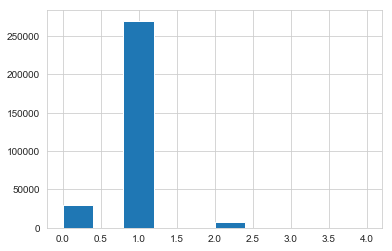

In [114]:
application_train['DOCUMENT_COUNT'].hist()

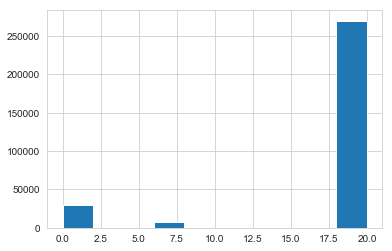

In [119]:
application_train[docs].kurtosis(axis=1).hist()

# Missing data

In [16]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

In [17]:
missing_data(application_train).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [20]:
missing_data(application_test).head(10)

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


In [21]:
missing_data(bureau)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_TYPE,0,0.000000
AMT_CREDIT_SUM_OVERDUE,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000


In [22]:
missing_data(bureau_balance)

,Total,Percent
STATUS,0,0.0
MONTHS_BALANCE,0,0.0
SK_ID_BUREAU,0,0.0


In [23]:
missing_data(credit_card_balance)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_DPD_DEF,0,0.000000


In [24]:
missing_data(installments_payments)

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [25]:
missing_data(previous_application).head(10)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


In [26]:
missing_data(POS_CASH_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
MONTHS_BALANCE,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


# Check Data Unbalance 

In [28]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

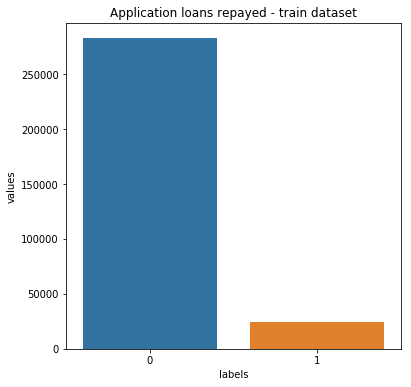

In [27]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                  'values': temp.values})
plt.figure(figsize=(6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y = 'values', data = df)
locs, labels = plt.xticks()
plt.show()

# Explore the Data

In [46]:
application_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [49]:
application_train[["NAME_CONTRACT_TYPE", 'TARGET']].groupby(["NAME_CONTRACT_TYPE"],as_index=False).sum()

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,23221
1,Revolving loans,1604


In [29]:
def plot_stats(feature,label_rotation=False, horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [30]:
def plot_distribution(var):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

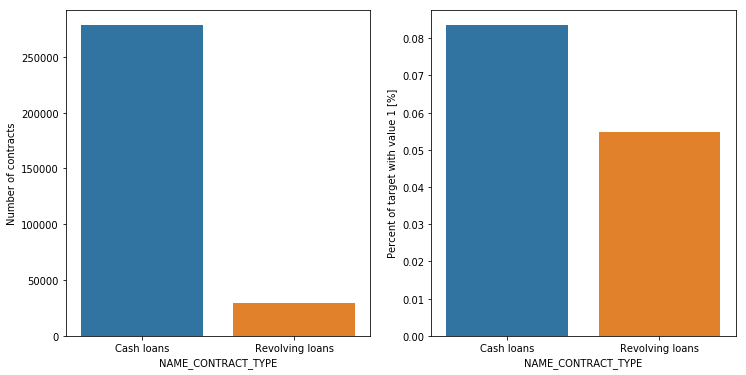

In [31]:
plot_stats('NAME_CONTRACT_TYPE')

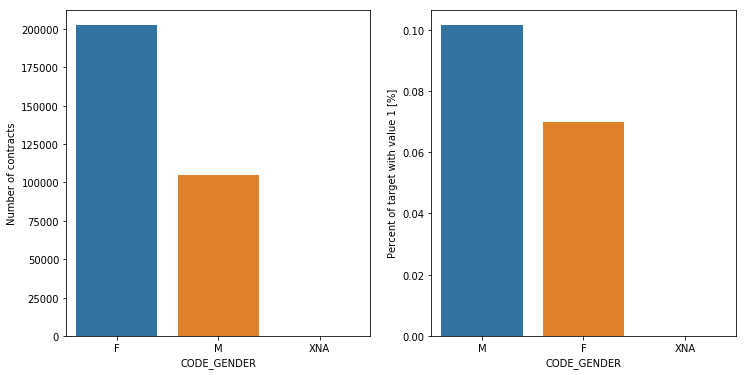

In [51]:
plot_stats('CODE_GENDER')

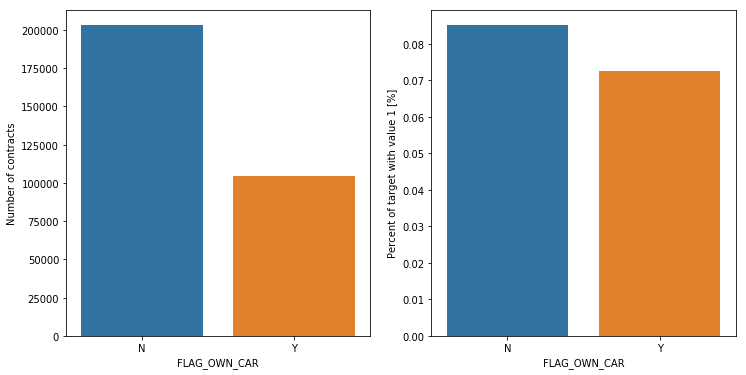

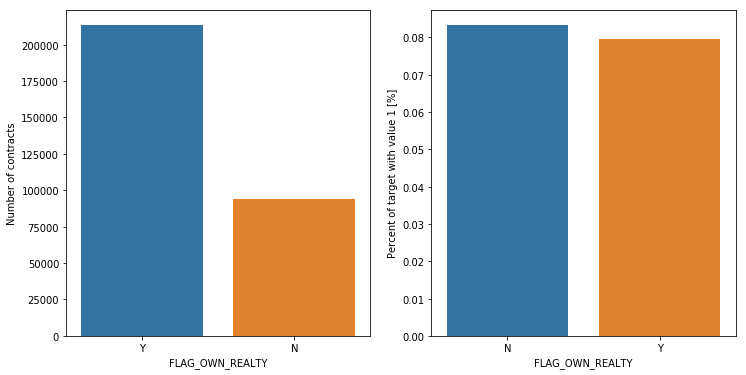

In [52]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

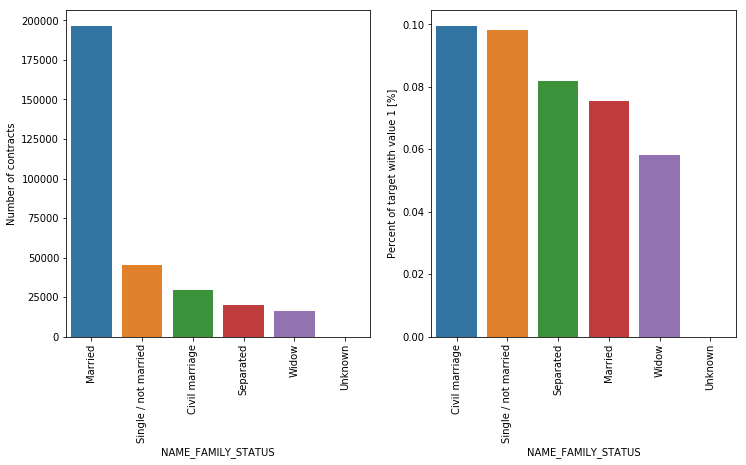

In [53]:
plot_stats('NAME_FAMILY_STATUS',True, True)

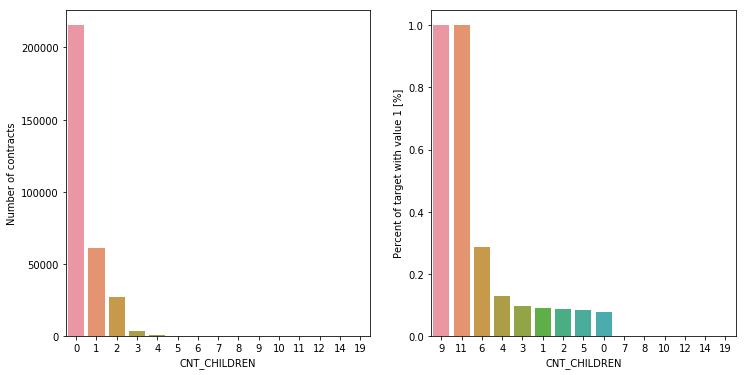

In [54]:
plot_stats('CNT_CHILDREN')

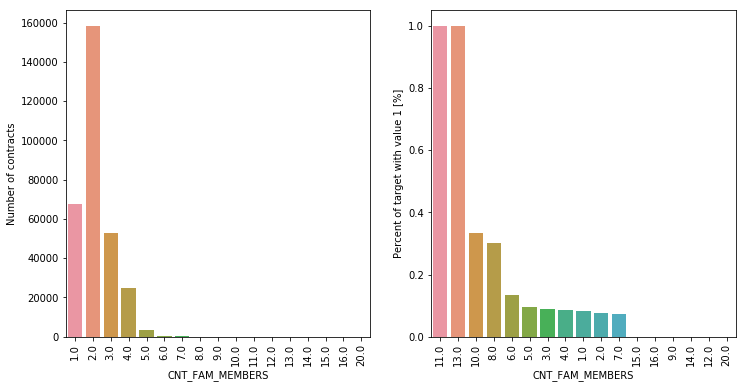

In [55]:
plot_stats('CNT_FAM_MEMBERS',True)

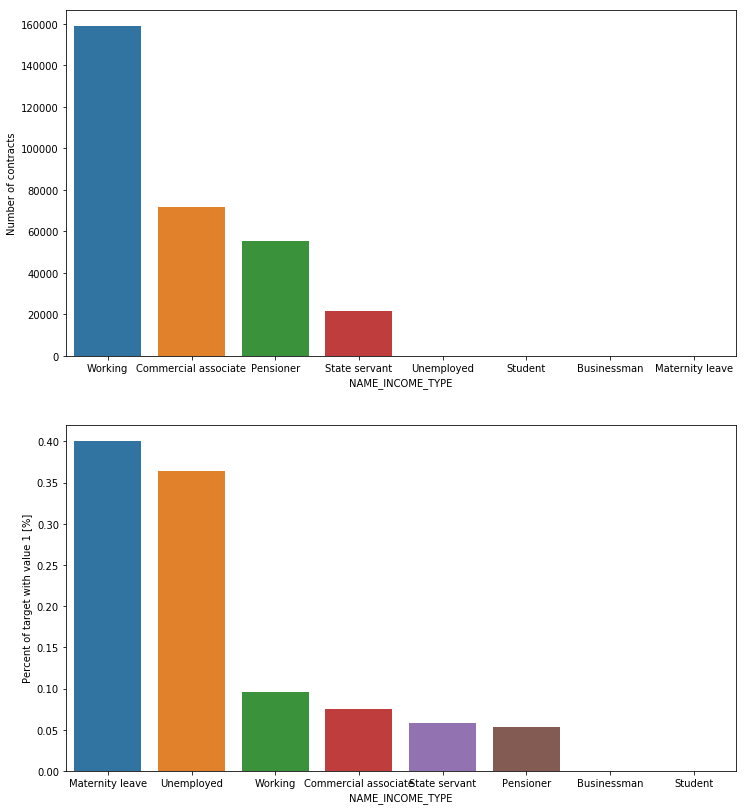

In [56]:
plot_stats('NAME_INCOME_TYPE',False,False)

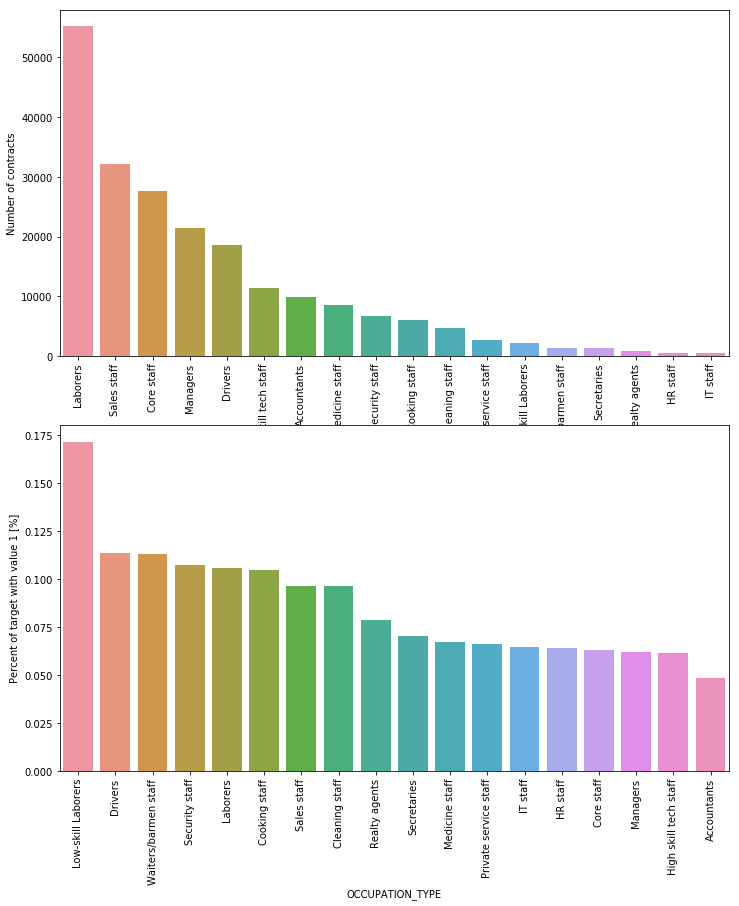

In [57]:
plot_stats('OCCUPATION_TYPE',True, False)

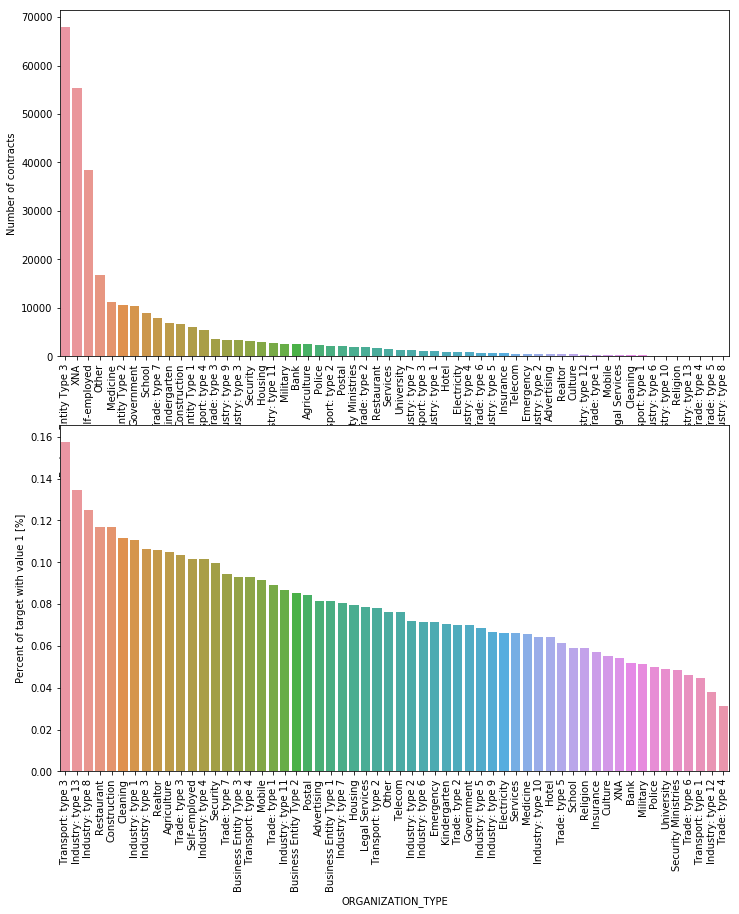

In [58]:
plot_stats('ORGANIZATION_TYPE',True, False)

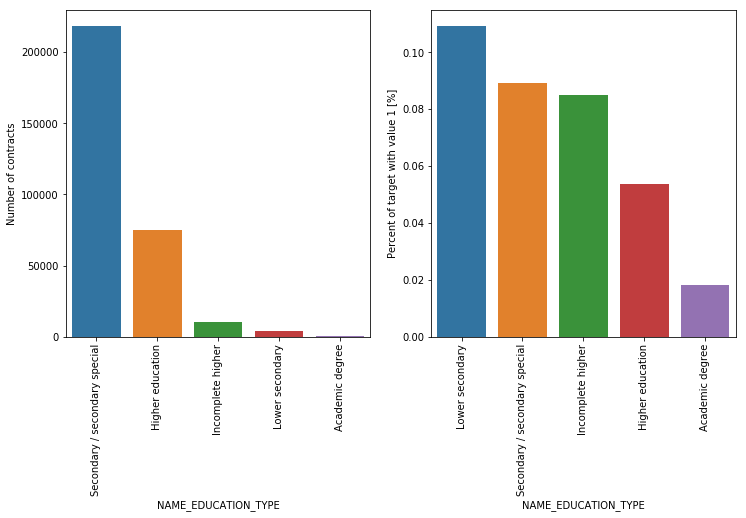

In [59]:
plot_stats('NAME_EDUCATION_TYPE',True)

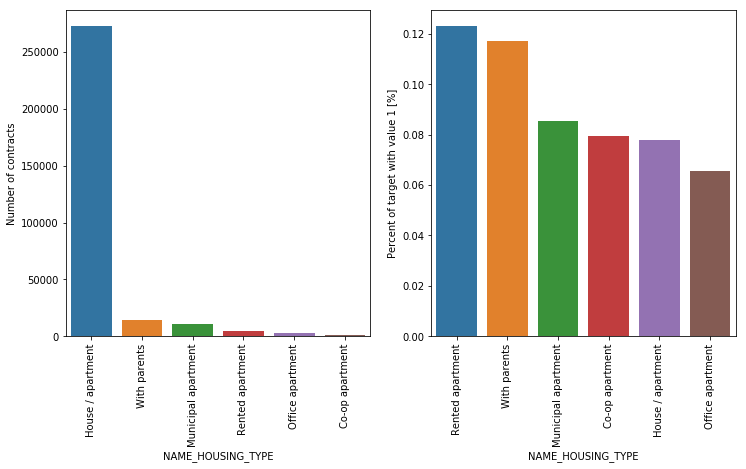

In [60]:
plot_stats('NAME_HOUSING_TYPE',True)

### Total Income Distribution

In [61]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()  

In [62]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

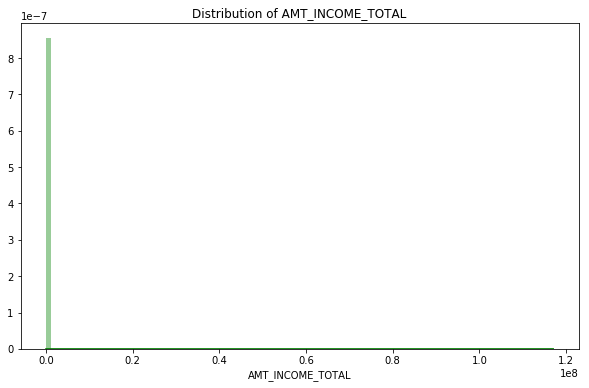

In [63]:
plot_distribution('AMT_INCOME_TOTAL','green')

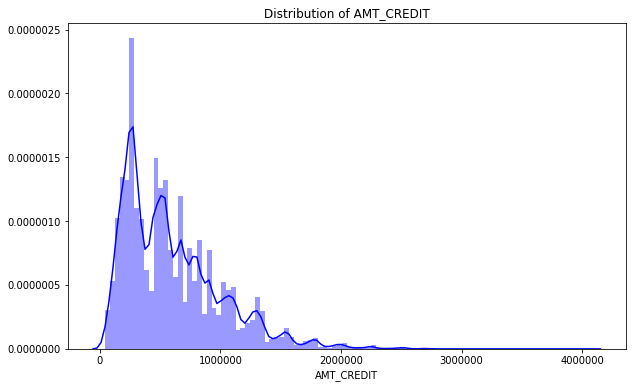

In [64]:
plot_distribution('AMT_CREDIT','blue')

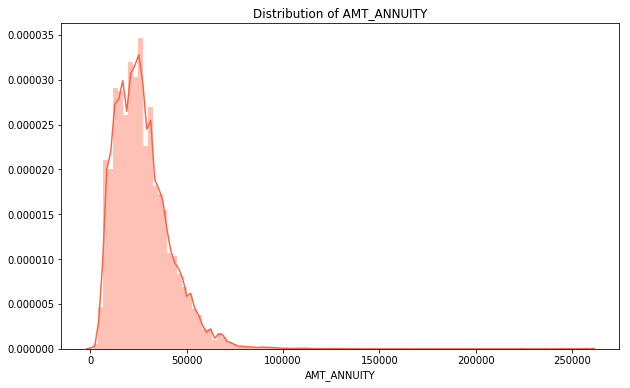

In [65]:
plot_distribution('AMT_ANNUITY','tomato')

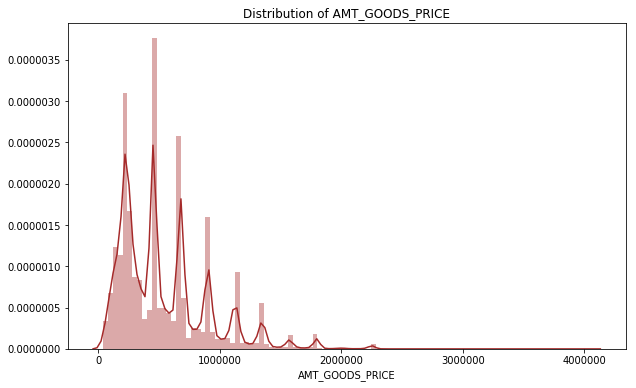

In [66]:
plot_distribution('AMT_GOODS_PRICE','brown')

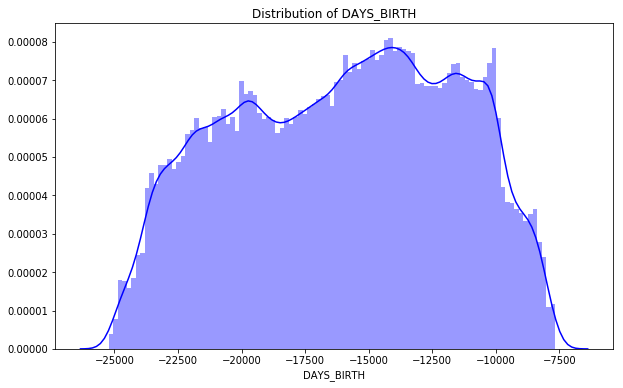

In [67]:
plot_distribution('DAYS_BIRTH','blue')

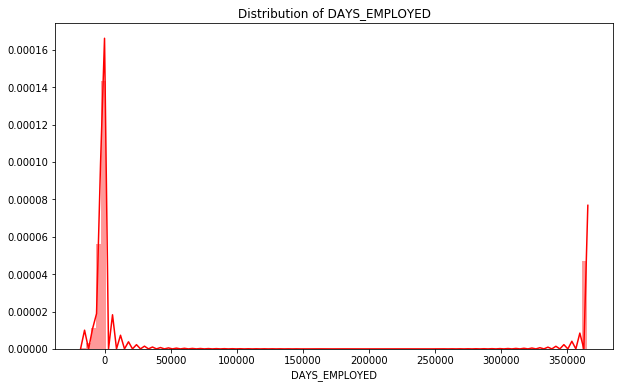

In [68]:
plot_distribution('DAYS_EMPLOYED','red')

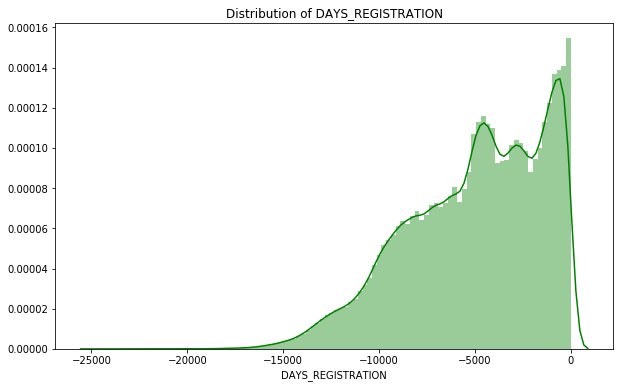

In [69]:
plot_distribution('DAYS_REGISTRATION','green')

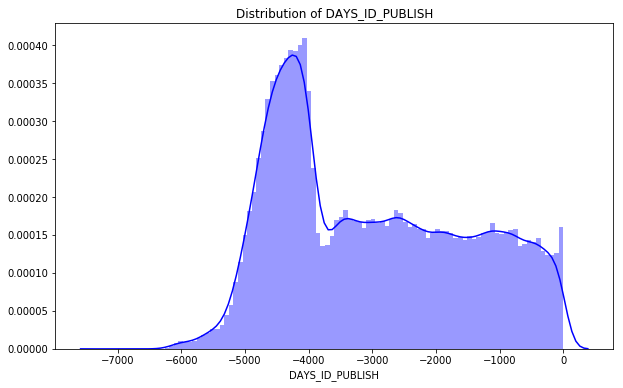

In [70]:
plot_distribution('DAYS_ID_PUBLISH','blue')

### Comparison of interval values with TARGET = 1 and TARGET = 0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 432x288 with 0 Axes>

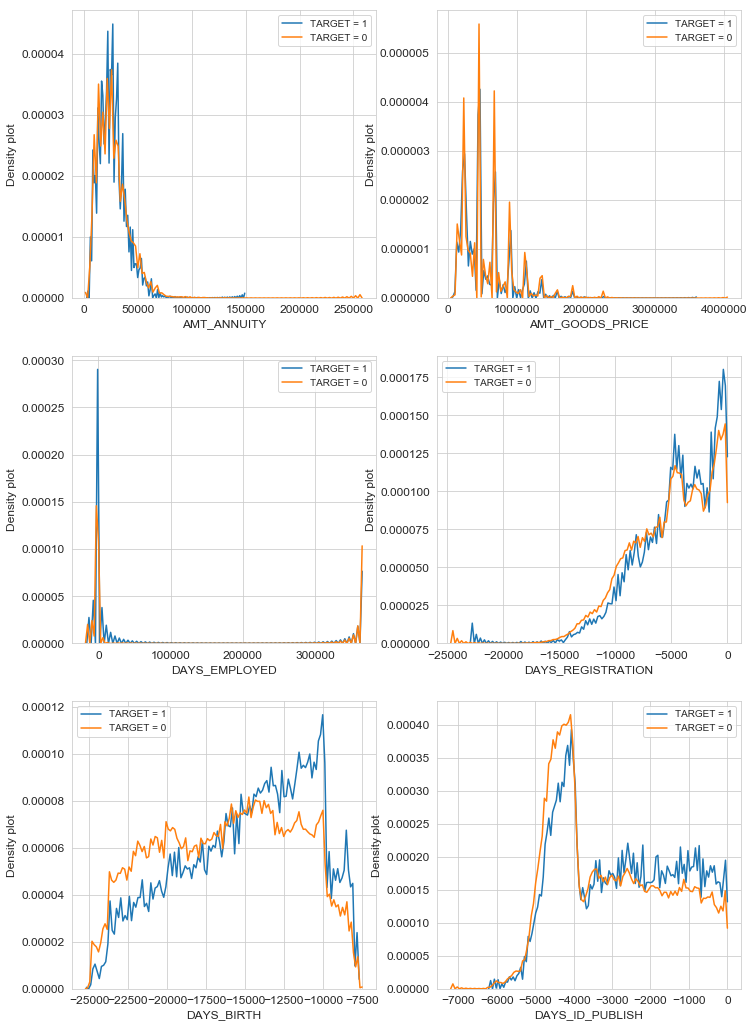

In [71]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

### Region registered not live region and not work region

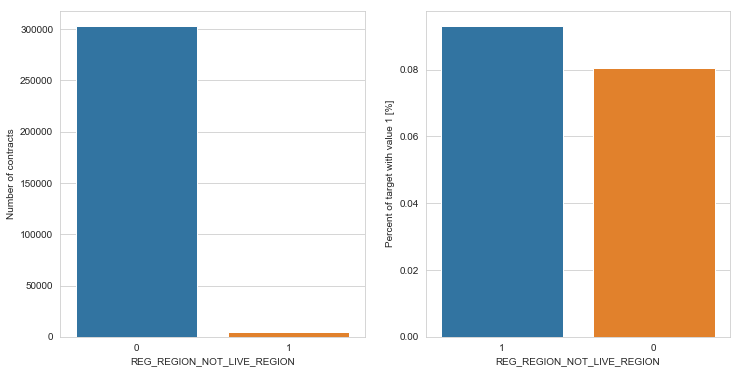

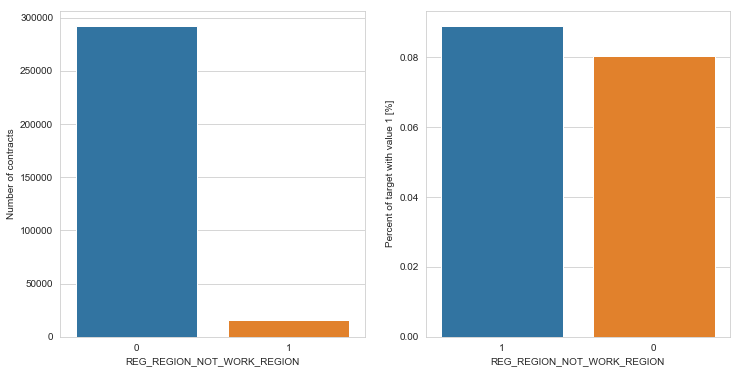

In [72]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

### City registered not live city and not work city

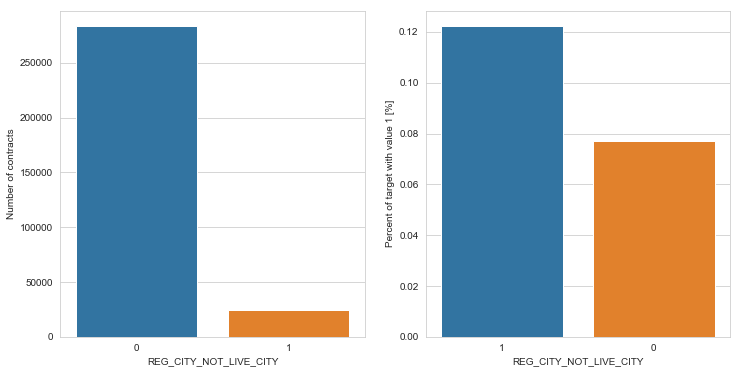

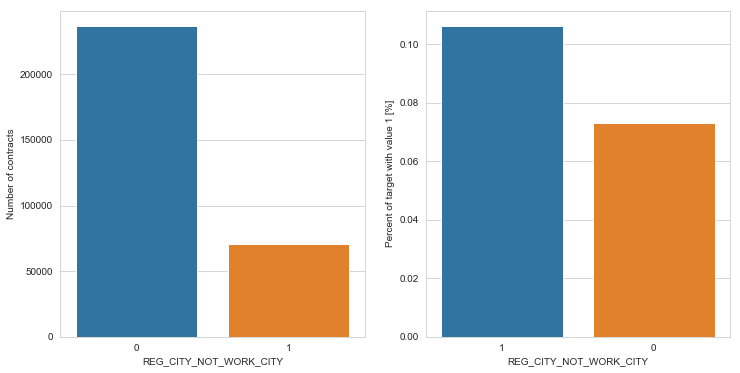

In [73]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

# Reference :  
- https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda